# Quick example to smooth a signal

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import rampy as rp

# Creating a fake, noisy signal

In [5]:
nb_points  = 200
x = np.linspace(50, 600, nb_points)

# gaussian peaks
p1 = 20.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2)
p2 = 100.0 * np.exp(-np.log(2) * ((x-250.0)/20.0)**2)
p3 = 50.0 * np.exp(-np.log(2) * ((x-450.0)/50.0)**2)
p4 = 20.0 * np.exp(-np.log(2) * ((x-350.0)/300)**2)
p5 = 30.0 * np.exp(-np.log(2) * ((x-460.0)/5.0)**2)

# background: a large gaussian + linear 
bkg = 60.0 * np.exp(-np.log(2) * ((x-250.0)/200.0)**2) + 0.1*x

#noise
noise = 2.0 * np.random.normal(size=nb_points)

#observation
y = p1 + p2 + p3 + p4 + p5 + noise +bkg


# Smoothing the signal with the smooth() function



In [10]:
y_smo_1 = rp.smooth(x,y,method="savgol",window_length=5,polyorder=2)
y_smo_2 = rp.smooth(x,y,method="whittaker",Lambda=10**0.5)
y_smo_3 = rp.smooth(x,y,method="flat",window_length=5)
y_smo_4 = rp.smooth(x,y,method="hanning",window_length=5)
y_smo_5 = rp.smooth(x,y,method="hamming",window_length=5)
y_smo_6 = rp.smooth(x,y,method="bartlett",window_length=5)
y_smo_7 = rp.smooth(x,y,method="blackman",window_length=5)

# Figures

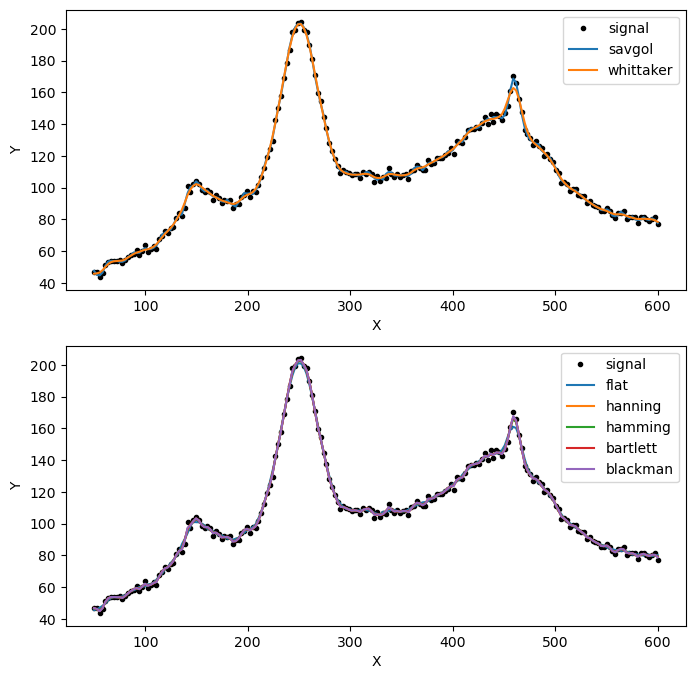

In [12]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(x,y,"k.",label="signal")
 
plt.plot(x,y_smo_1,label="savgol")
plt.plot(x,y_smo_2,label="whittaker")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,y,"k.",label="signal")
plt.plot(x,y_smo_3,label="flat")
plt.plot(x,y_smo_4,label="hanning")
plt.plot(x,y_smo_5,label="hamming")
plt.plot(x,y_smo_6,label="bartlett")
plt.plot(x,y_smo_7,label="blackman")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()